In [52]:
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import humanize

In [2]:
df = pd.read_csv('Desktop/Learning Folder/python/website_performance_data.csv', header=1)
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [5]:
# data cleaning: 
renamed_col = {
    'Session Primary Channel Group (Default Channel Group)': 'Marketing Channel',
    'Date + Hour (Yyyymmddhh)': 'Timestamp',
    'Marketing_Channel':'Marketing Channel'
}
df = df.rename(columns=renamed_col)
df.columns = df.columns.str.strip().str.title()
print("COLUMNS CLEANED:", df.columns)

# converting to datetime datatype:
df['Timestamp']= pd.to_datetime(df['Timestamp'], format='%Y%m%d%H')
print("CONVERTED TO DATETIME", df['Timestamp'])

COLUMNS CLEANED: Index(['Marketing Channel', 'Timestamp', 'Users', 'Sessions',
       'Engaged Sessions', 'Average Engagement Time Per Session',
       'Engaged Sessions Per User', 'Events Per Session', 'Engagement Rate',
       'Event Count'],
      dtype='object')
CONVERTED TO DATETIME 0      2024-04-16 23:00:00
1      2024-04-17 19:00:00
2      2024-04-17 23:00:00
3      2024-04-17 18:00:00
4      2024-04-17 20:00:00
               ...        
3177   2024-04-28 06:00:00
3178   2024-04-30 05:00:00
3179   2024-04-30 06:00:00
3180   2024-05-01 05:00:00
3181   2024-05-03 07:00:00
Name: Timestamp, Length: 3182, dtype: datetime64[ns]


In [6]:
df['Hour'] = df['Timestamp'].dt.hour
df['Hour']

0       23
1       19
2       23
3       18
4       20
        ..
3177     6
3178     5
3179     6
3180     5
3181     7
Name: Hour, Length: 3182, dtype: int32

In [7]:
df.shape

(3182, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Marketing Channel                    3182 non-null   object        
 1   Timestamp                            3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average Engagement Time Per Session  3182 non-null   float64       
 6   Engaged Sessions Per User            3182 non-null   float64       
 7   Events Per Session                   3182 non-null   float64       
 8   Engagement Rate                      3182 non-null   float64       
 9   Event Count                          3182 non-null   int64         
 10  Hour        

In [9]:
df.head()

,Marketing Channel,Timestamp,Users,Sessions,Engaged Sessions,Average Engagement Time Per Session,Engaged Sessions Per User,Events Per Session,Engagement Rate,Event Count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [10]:
# basic descriptive stats: 
df.describe()

,Timestamp,Users,Sessions,Engaged Sessions,Average Engagement Time Per Session,Engaged Sessions Per User,Events Per Session,Engagement Rate,Event Count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# KPI's:

In [79]:
# No. of Unique marketing channels:
unique_marketing_channels = df['Marketing Channel'].nunique()
print("1. No. of unique marketing channels:", unique_marketing_channels)

# Total users:
total_website_users= df['Users'].sum()
print("2. Total website users:", humanize.intcomma(total_website_users))

# Engagement Rate%: 
engagement_rate = ((df['Engaged Sessions'].sum())/(df['Sessions'].sum())*100).round(2)
print(f"3. Engagement Rate: {engagement_rate}%")

# Total sessions or visit on website: 
total_visits = df['Sessions'].sum()
print("4. Total sessions:", humanize.intcomma(total_visits))

# No. of Engaged Sessions and Non engaged sessions:
engaged_sessions= df['Engaged Sessions'].sum()
non_engaged_sessions = df['Non Engaged Sessions'].sum()
print(f"    - No. of Engaged Sessions: {humanize.intcomma(engaged_sessions)}\n    - No. of Non-Engaged Sessions: {humanize.intcomma(non_engaged_sessions)}")

# No. of event counts: (actions tracked)
events_count = df['Event Count'].sum()
print("5. Total actions tracked on website:", humanize.intcomma(events_count))

# Average Engagement Time:
avg_engagement= df['Average Engagement Time Per Session'].mean().round(2)
print(f"6. Average Engagement Time: {avg_engagement} sec")

1. No. of unique marketing channels: 7
2. Total website users: 133,440
3. Engagement Rate: 55.33%
4. Total sessions: 162,895
    - No. of Engaged Sessions: 90,132
    - No. of Non-Engaged Sessions: 72,763
5. Total actions tracked on website: 770,911
6. Average Engagement Time: 66.64 sec


# Business Questions:


Sessions and users over time:                      Users  Sessions
Timestamp                           
2024-04-06 00:00:00    197       270
2024-04-06 01:00:00    107       142
2024-04-06 02:00:00    115       142
2024-04-06 03:00:00     93       122
2024-04-06 04:00:00     79       102
...                    ...       ...
2024-05-03 19:00:00    264       324
2024-05-03 20:00:00    273       327
2024-05-03 21:00:00    315       374
2024-05-03 22:00:00    304       374
2024-05-03 23:00:00    216       256

[672 rows x 2 columns]


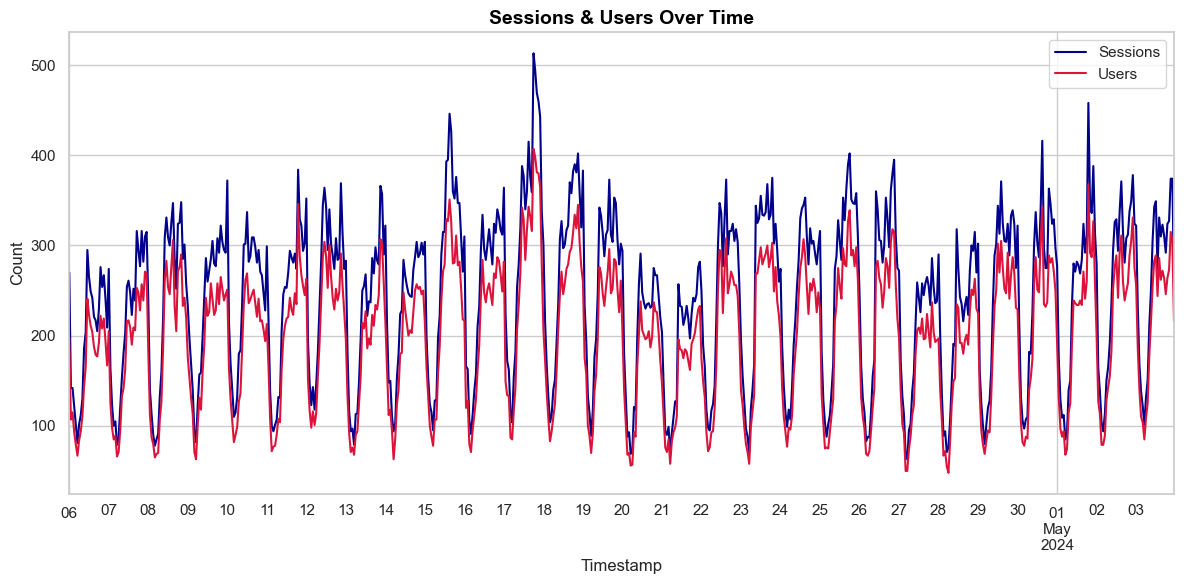

In [164]:
# sessions and users over time: 
sessions_grpby = df.groupby('Timestamp')[['Users','Sessions']].sum()
print('Sessions and users over time:', sessions_grpby)

# plotting:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

sessions_grpby[['Sessions', 'Users']].plot(ax=plt.gca(), 
                                           color=['darkblue', 'crimson'],
                                           linewidth=1.5)

plt.title('Sessions & Users Over Time', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['Sessions', 'Users'], loc='best')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Sessions and users over time.png')
plt.show()

Best Performing Marketing Channel: Marketing Channel
Direct            30042
Email                 2
Organic Search    28387
Organic Social    47572
Organic Video       123
Referral          26774
Unassigned          540
Name: Users, dtype: int64


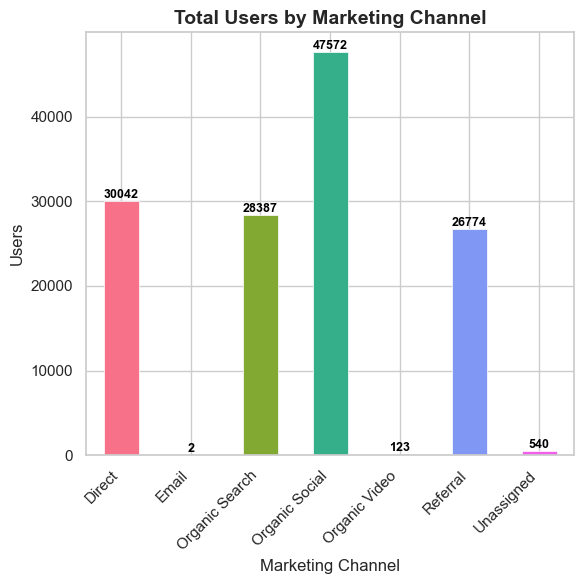

In [12]:
# total users by marketing channel: 
total_users = df.groupby('Marketing Channel')['Users'].sum()
print("Best Performing Marketing Channel:", total_users)

# plotting:
plt.figure(figsize=(6, 6))
colors = sns.color_palette("husl", len(total_users))
ax = total_users.plot(kind='bar', color=colors, edgecolor='white', linewidth=0.5)

# Add labels
ax.bar_label(ax.containers[0], fontsize=9, color='black', fontweight='bold')

plt.title('Total Users by Marketing Channel', fontsize=14, fontweight='bold')
plt.xlabel('Marketing Channel')
plt.ylabel('Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Q3. Which channel has the highest avg. engagement time and what does that tell us about behaviour and content effectiveness


Avg engagement time by Marketing Channel: Marketing Channel
Organic Video     180.36
Referral           92.66
Unassigned         78.96
Email              72.67
Organic Social     53.49
Organic Search     47.01
Direct             45.53
Name: Average Engagement Time Per Session, dtype: float64


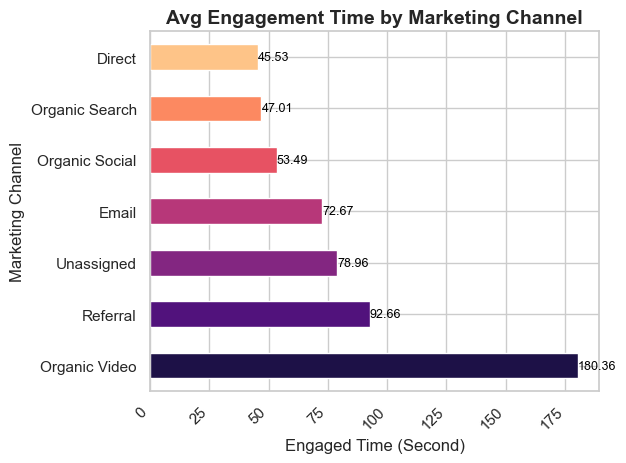

In [165]:
# Avg engagement time by marketing channel:
avg_engagement_time = df.groupby('Marketing Channel')['Average Engagement Time Per Session'].mean().sort_values(ascending=False).round(2)
print("\nAvg engagement time by Marketing Channel:", avg_engagement_time)

# plotting:
colors = sns.color_palette("magma", len(avg_engagement_time))
avg_time_ax = avg_engagement_time.plot(kind='barh', color=colors)

# Add labels
avg_time_ax.bar_label(avg_time_ax.containers[0], fontsize=9, color='black')

plt.title('Avg Engagement Time by Marketing Channel', fontsize=14, fontweight='bold')
plt.xlabel('Engaged Time (Second)')
plt.ylabel('Marketing Channel')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Avg engagement time by Marketing Channel.png')
plt.show()

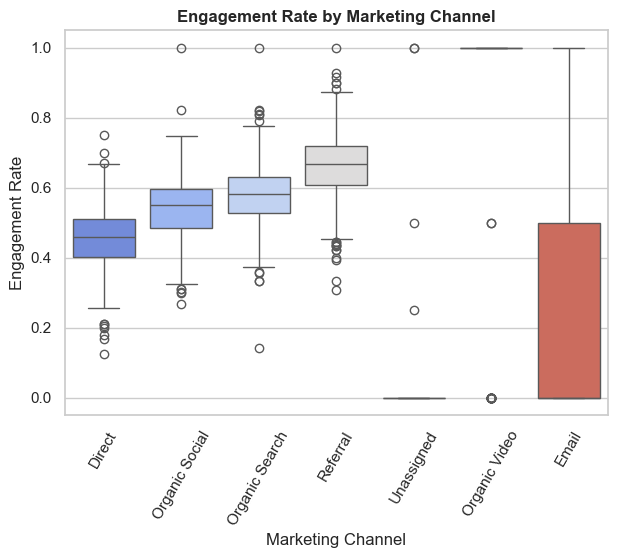

In [14]:
# engagement rate distribution by traffic channels: 
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Marketing Channel', y='Engagement Rate', 
            hue='Marketing Channel', palette='coolwarm', legend=False)
plt.title('Engagement Rate by Marketing Channel', fontsize=12, fontweight = 'bold')
plt.xticks(rotation=60)
plt.show()

NON ENGAGED COLUMN CREATED


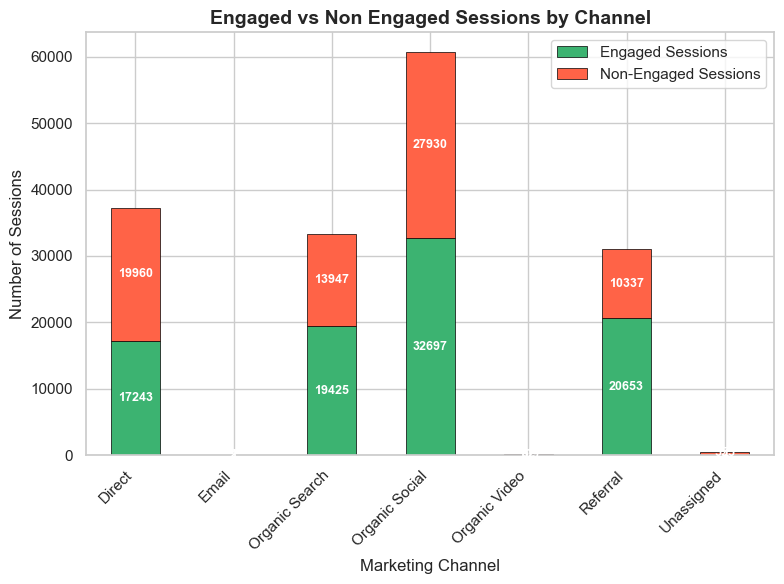

In [15]:
df['Non Engaged Sessions']= df['Sessions']-df['Engaged Sessions'] # created non engaged column
print("NON ENGAGED COLUMN CREATED")

# Engaged vs non engaged sessions:
channel_summary = df.groupby('Marketing Channel')[['Engaged Sessions', 'Non Engaged Sessions']].sum()

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

channel_summary.plot(kind='bar', stacked=True, color=['mediumseagreen', 'tomato'],ax=ax, edgecolor='black',linewidth=0.5)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=9, color='white', fontweight='bold')

plt.title('Engaged vs Non Engaged Sessions by Channel', fontsize=14, fontweight='bold')
plt.xlabel('Marketing Channel', fontsize=12)
plt.ylabel('Number of Sessions', fontsize=12)
plt.legend(['Engaged Sessions', 'Non-Engaged Sessions'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Hourly Traffic per channel Marketing Channel  Direct  Email  Organic Search  Organic Social  \
Hour                                                               
0                  1684.0    0.0          1311.0          3917.0   
1                  1196.0    0.0           984.0          2108.0   
2                   887.0    1.0           804.0          1537.0   
3                   771.0    0.0           606.0          1249.0   
4                   666.0    1.0           535.0          1081.0   
5                   679.0    0.0           506.0           951.0   
6                   768.0    0.0           639.0          1171.0   
7                   889.0    0.0           778.0          1524.0   
8                  1078.0    0.0           938.0          1886.0   
9                  1347.0    0.0          1269.0          2390.0   
10                 1621.0    0.0          1649.0          2834.0   
11                 1892.0    0.0          1839.0          3069.0   
12                 18

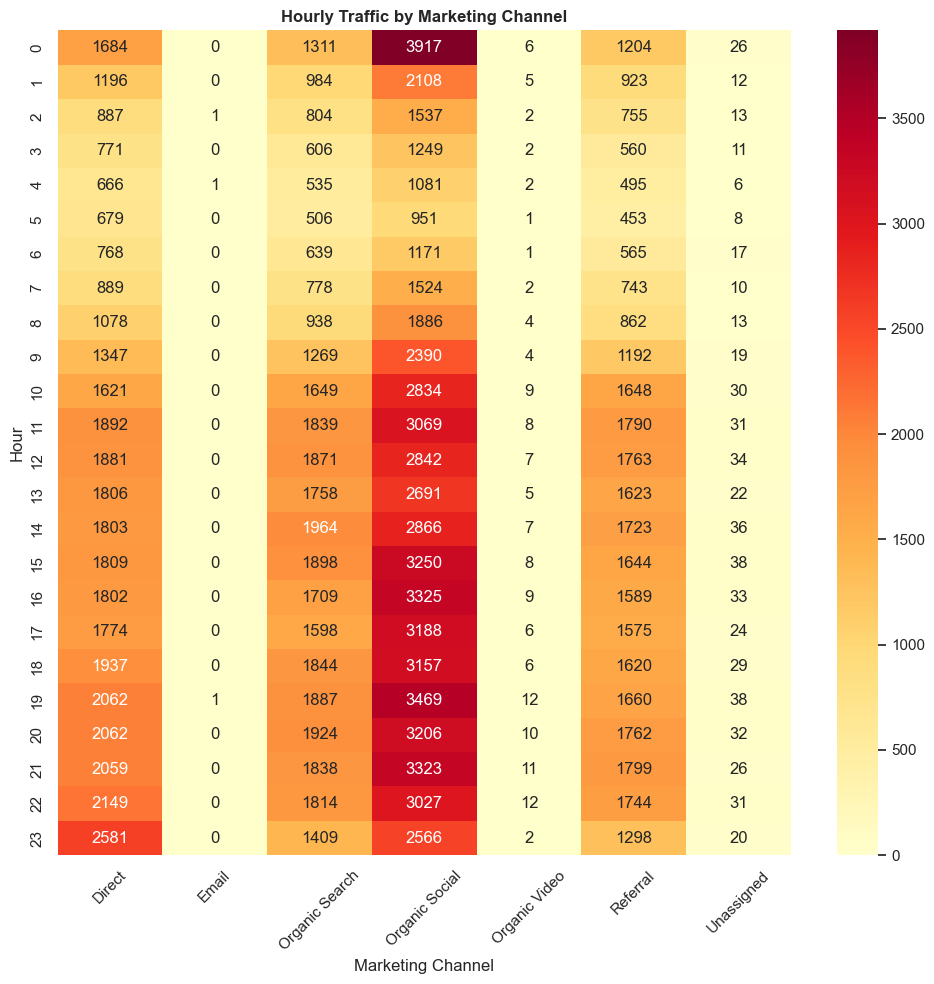

In [167]:
# traffic by hour and channel:
hourly_traffic= df.groupby(['Hour','Marketing Channel'])['Sessions'].sum().unstack().fillna(0)
print('Hourly Traffic per channel', hourly_traffic)

# heatmap:
plt.figure(figsize=(10,10))
sns.heatmap(hourly_traffic, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Hourly Traffic by Marketing Channel', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Hourly Traffic per channel.png')
plt.show()

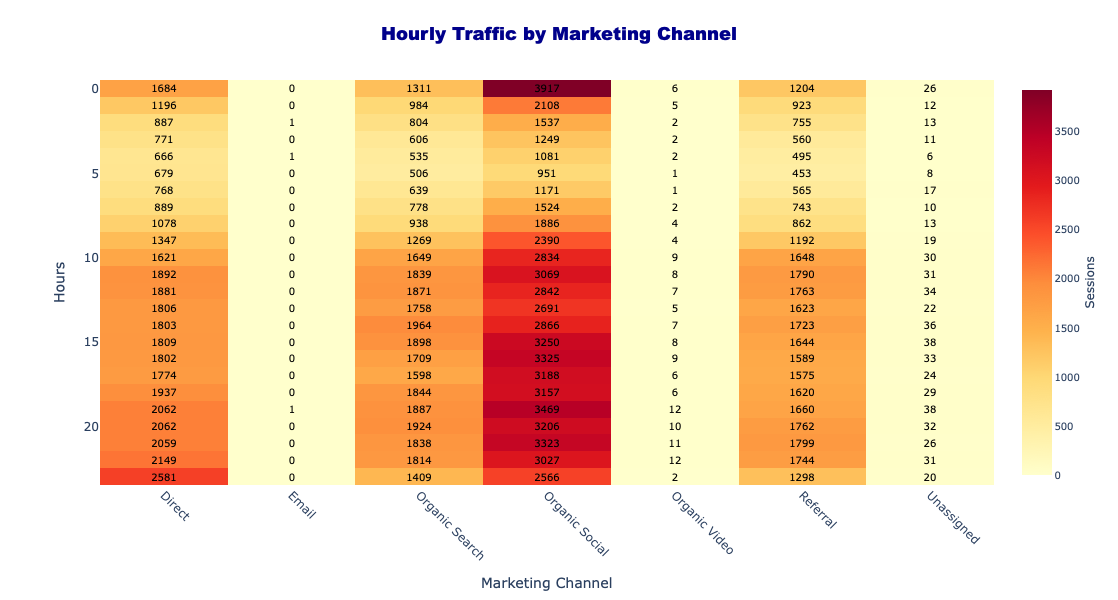

In [169]:
# INTERACTIVE HEATMAP IN PLOTLY USING AI:

# Create interactive heatmap
fig = px.imshow(
    hourly_traffic,
    labels=dict(x="Hour of Day", y="Marketing Channel", color="Sessions"),
    x=hourly_traffic.columns,
    y=hourly_traffic.index,
    color_continuous_scale='YlOrRd',  # Same as seaborn
    aspect='auto',
    text_auto=True,  # Show values on cells
    title='Hourly Traffic by Marketing Channel'
)

# Improve layout
fig.update_layout(
    title=dict(text='Hourly Traffic by Marketing Channel', x=0.5, xanchor='center',
        font=dict(size=18, color='darkblue', 
                  family='Arial Black')
    ),
    width=900,
    height=600,
    xaxis=dict(
        title='Marketing Channel',
        tickangle=45,
        side='bottom'
    ),
    yaxis=dict(
        title='Hours',
        autorange='reversed'  # Top to bottom
    ),
    coloraxis_colorbar=dict(
        title='Sessions',
        titleside='right',
        titlefont=dict(size=12),
        tickfont=dict(size=10)
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=100, r=50, t=80, b=80)
)

# Add hover template
fig.update_traces(
    hovertemplate='<b>%{y}</b><br>' +
                  'Hour: %{x}<br>' +
                  'Sessions: %{z}<extra></extra>',
    textfont=dict(size=10, color='black')
)

fig.show()


Session vs Engagement Rate:               Timestamp  Engagement Rate   Sessions
0   2024-04-06 00:00:00         0.450262  54.000000
1   2024-04-06 01:00:00         0.489905  35.500000
2   2024-04-06 02:00:00         0.595759  35.500000
3   2024-04-06 03:00:00         0.446725  24.400000
4   2024-04-06 04:00:00         0.494964  25.500000
..                  ...              ...        ...
667 2024-05-03 19:00:00         0.498125  54.000000
668 2024-05-03 20:00:00         0.375790  54.500000
669 2024-05-03 21:00:00         0.471312  74.800000
670 2024-05-03 22:00:00         0.367749  62.333333
671 2024-05-03 23:00:00         0.585665  64.000000

[672 rows x 3 columns]


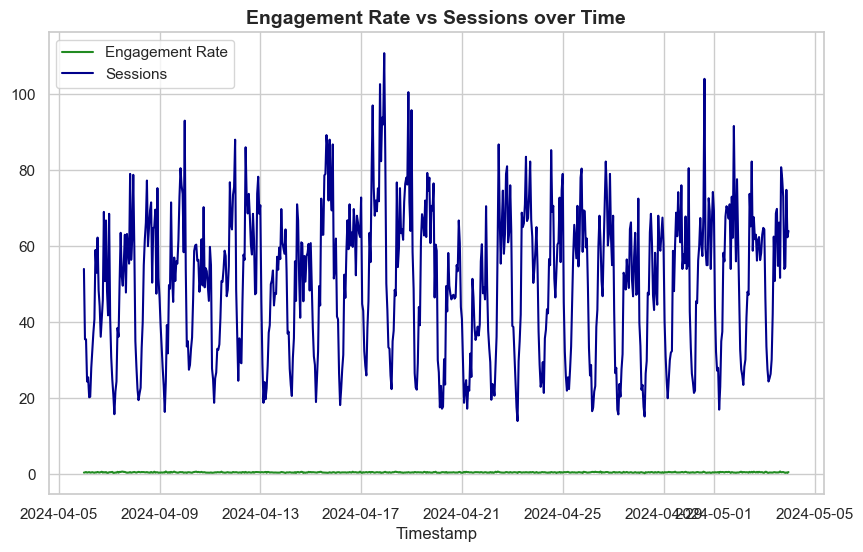

In [47]:
# Sessions vs Engagement rate over time: 
correlation= df.groupby('Timestamp')[['Engagement Rate','Sessions']].mean().reset_index()
print("\nSession vs Engagement Rate:", correlation)

# plot: 
plt.figure(figsize=(10,6))
plt.plot(correlation['Timestamp'],correlation['Engagement Rate'], label= "Engagement Rate", color='forestgreen')
plt.plot(correlation['Timestamp'],correlation['Sessions'], label= "Sessions", color='darkblue')
plt.title("Engagement Rate vs Sessions over Time", fontsize=14, fontweight='bold')
plt.xlabel('Timestamp')
plt.legend()
plt.grid(True)
plt.tight_layout
plt.show()

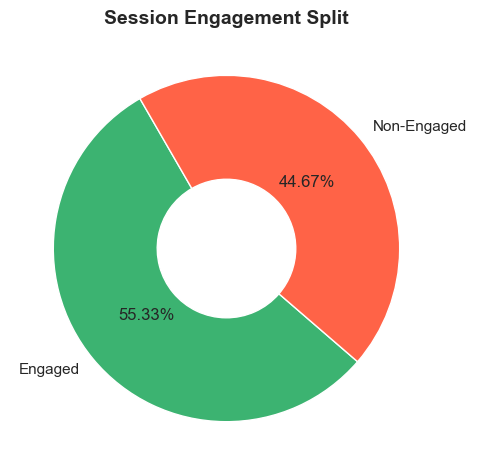

In [113]:
# Session engagement split %: 
engaged = df['Engaged Sessions'].sum()
non_engaged = df['Non Engaged Sessions'].sum()

# Donut chart:
fig, ax = plt.subplots(figsize=(5,5))
ax.pie([engaged, non_engaged], 
       labels=['Engaged', 'Non-Engaged'],
       autopct='%1.2f%%',
       colors=['mediumseagreen', 'tomato'],
       wedgeprops=dict(width=0.6, edgecolor='white'),
       startangle=120)

plt.title('Session Engagement Split', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Sessions by Hour:     Hour  Sessions
0      0      8148
1      1      5228
2      2      3999
3      3      3199
4      4      2786
5      5      2598
6      6      3161
7      7      3946
8      8      4781
9      9      6221
10    10      7791
11    11      8629
12    12      8398
13    13      7905
14    14      8399
15    15      8647
16    16      8467
17    17      8165
18    18      8593
19    19      9129
20    20      8996
21    21      9056
22    22      8777
23    23      7876


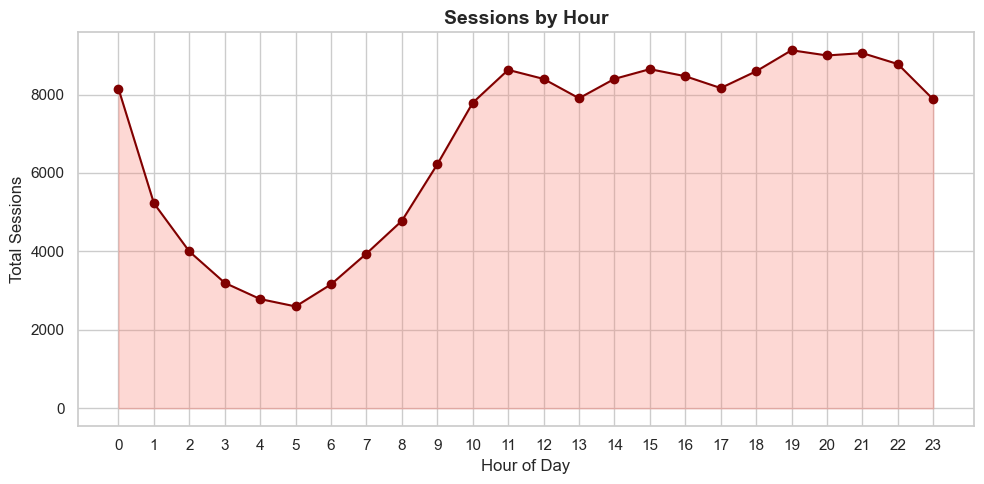

In [168]:
# Sessions by Hour:
session_hour = (df.groupby('Hour')['Sessions'].sum().sort_index().reset_index())
print("Sessions by Hour:", session_hour)

# area chart:
plt.figure(figsize=(10,5))
plt.plot(session_hour['Hour'],session_hour['Sessions'],marker='o', color= 'maroon')
plt.fill_between(session_hour['Hour'],session_hour['Sessions'],alpha=0.3, color='salmon')

plt.title("Sessions by Hour", fontsize=14, fontweight= 'bold')
plt.xlabel("Hour of Day")
plt.ylabel("Total Sessions")
plt.xticks(session_hour['Hour'])
plt.tight_layout()
plt.savefig('Sessions by Hour.png')
plt.show()

Total Sessions by Marketing Channel Marketing Channel
Direct            37203
Email                 3
Organic Search    33372
Organic Social    60627
Organic Video       141
Referral          30990
Unassigned          559
Name: Sessions, dtype: int64


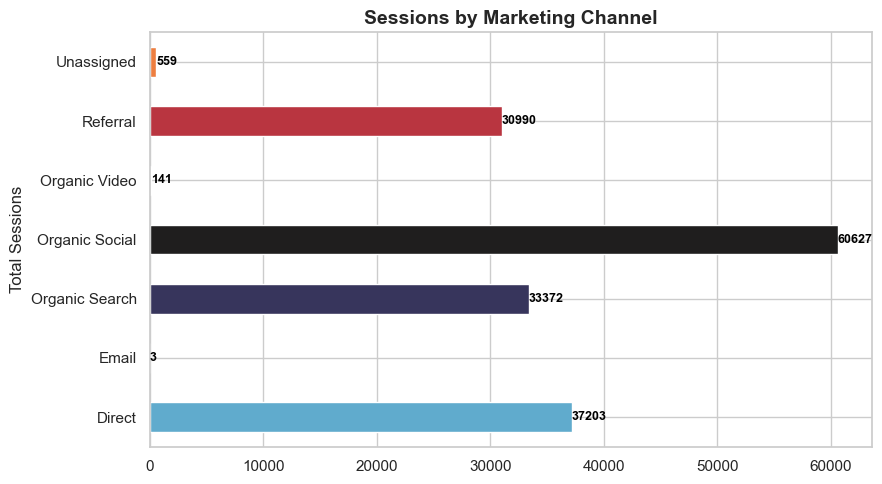

In [163]:
# Sessions by channels: 
sessions_channel= df.groupby('Marketing Channel')['Sessions'].sum()
print('Total Sessions by Marketing Channel', sessions_channel)

# horizontal bar graph:
plt.figure(figsize=(9,5))
colors= sns.color_palette("icefire", len(sessions_channel))
ax_ses= sessions_channel.plot(kind='barh', color= colors)

ax_ses.bar_label(ax_ses.containers[0], fontsize=9, color='black', fontweight='bold')

plt.title("Sessions by Marketing Channel", fontsize=14, fontweight='bold')
plt.ylabel("Total Sessions")
plt.tight_layout()
plt.show()